# Reprocessing and Feature Engineering

The output from this 02 step is to have a processed data with ready features for model analysis. 

In [102]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
df = pd.read_csv('../data/train_01_Cleaned.csv')

---
### Feature Engineering :
1. Binarize `commercial` and `market_hawker` columns
2. Create `Ammenities_same_block`:  0- no commercial nor market/hawker in the same block, 1- has either commerical or market/hawker in same block, 2- has both commercial and market/hawker
3. Create `Ammenities_within_500m`: sum of mall within 500m and hawker_within_500m
4. Create `Ammenities_within_1km`: sum of mall within 1km and hawker_within_1km
5. Create `Ammenities_within_2km`: sum of mall within 2km and hawker_within_2km
6. Create `pri_sch_dist_vacancy` : interaction terms between `pri_sch_nearest_distance` and `vacancy`. 
- The nearer to a primary school is perceived as more value
- The lesser the vacancy (for primary 1 enrollment) indicates the school is a more "popular" choice
7. Create `sec_sch_dist_cutoff` : interaction terms between `sec_sch_nearest_dist` and `cutoff` (reciprocal)
- The nearer to a primary school is perceived as more value
- The higher the cutoff (i.e. minumum score in PSLE result to get a place in the school) indicates the school is a more "popular" choice
8. Create `mrt_colour` : indicate which MRT route (i.e. colour of the MRT route) the nearest MRT station has access to
9. Create `mrt_no` : indicate the number of MRT lines the nearest MRT station has access to 
10. Convert `Tranc_YearMonth` to integer, after removing the "-" its value
11. apply one-hot-encoding to the columns with categorical data that will become a Features into the model  


In [104]:
df['commercial'] = df['commercial'].map(lambda x: 1 if x == 'Y' else 0)
df['market_hawker'] = df['market_hawker'].map(lambda x: 1 if x == 'Y' else 0)

df['Ammenities_same_block'] = df['commercial'] + df['market_hawker']
df['Ammenities_within_500m'] = df['Mall_Within_500m'] + df['Hawker_Within_500m']
df['Ammenities_within_1km'] = (df['Mall_Within_1km'] -  df['Mall_Within_500m']) + (df['Hawker_Within_1km'] - df['Hawker_Within_500m'])
df['Ammenities_within_2km'] = (df['Mall_Within_2km'] - df['Mall_Within_1km'] ) + ( df['Hawker_Within_2km'] - df['Hawker_Within_1km'] )

In [105]:
df['pri_sch_dist_vacancy'] = df['pri_sch_nearest_distance'] * df['vacancy']
df['sec_sch_dist_cutoff'] = df['sec_sch_nearest_dist'] * ( 1 / df['cutoff_point'])

In [106]:
mrt_colour_dict = {'Kallang': 'green', 'Bishan':['orange','red'], 'Bukit Batok': 'red', 'Khatib': 'red', 'MacPherson': ['orange', 'blue'], 
       'Kovan': 'purple', 'Bedok North': 'blue', 'Marymount':'orange', 'Sengkang': 'purple', 'Buangkok':'purple', 'Tampines': ['green', 'blue'], 
       'Tiong Bahru':'green', 'Bukit Panjang':'blue', 'Marsiling':'red', 'Woodlands South':'brown', 'Admiralty':'red', 'Pioneer':'green', 'Braddell':'red', 
       'Lakeside': 'green', 'Choa Chu Kang': 'red', 'Sembawang': 'red', 'Toa Payoh':'red','Geylang Bahru': 'blue',
       'Yew Tee':'red', 'Ang Mo Kio':'red', 'Telok Blangah':'orange', 'Tampines East':'blue',
       'Potong Pasir':'purple', 'Tampines West':'blue', 'Eunos':'green', 'Yio Chu Kang':'red',
       'Farrer Park':'purple', 'Bukit Gombak':'red', 'Clementi':'green', 'Yishun':'red', 'Punggol':'purple',
       'Jurong East': ['green','red'], 'Tanah Merah':'green', 'Chinese Garden':'green', 'Kembangan':'green',
       'Pasir Ris':'green', 'Jalan Besar':'blue', 'Hougang':'purple', 'Buona Vista':['green','orange'], 'Kaki Bukit':'blue',
       'Cashew':'blue', 'Bedok':'green', 'Boon Keng':'purple', 'Woodlands':'brown', 'Simei':'green', 'Boon Lay':'green',
       'Dakota':'orange', 'Redhill':'green', 'Canberra':'blue', 'Beauty World':'blue', 'Commonwealth':'green',
       'Lorong Chuan':'orange', 'Tai Seng':'orange', 'Bedok Reservoir':'blue', 'Holland Village':'orange',
       'Ubi':'blue', 'HarbourFront':['orange','purple'], 'Dover':'green', 'Chinatown':['blue','purple'], 'Queenstown':'green',
       'Mattar':'blue', 'one-north':'orange', 'Mountbatten':'orange', 'Serangoon':['orange','purple'], 'Farrer Road':'orange',
       'Lavender':'green', 'Outram Park':['green', 'purple'], 'Caldecott':['orange','brown'], 'Aljunied':'green', 'Little India':['blue', 'purple'],
       'Upper Changi':'blue', 'Bartley':'orange', 'Woodlands North':'brown', 'Paya Lebar':['green', 'orange'],
       'Tanjong Pagar':'green', 'Woodleigh':'purple', 'Hillview':'blue', 'Bencoolen':'blue',
       'Labrador Park':'orange', 'Rochor':'blue', 'Nicoll Highway':'orange', 'Clarke Quay':'purple',
       'Tan Kah Kee':'blue', 'Bras Basah':'orange', 'Changi Airport':['green','blue'], 'Bugis':['green','blue'],
       'Bendemeer':'blue', 'Botanic Gardens':['orange', 'blue'], 'Novena':['blue','red'] } 

df['mrt_colour'] = df['mrt_name'].map(mrt_colour_dict).apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else str(x))
df['mrt_no'] = df['mrt_name'].map(mrt_colour_dict).apply(lambda x: len(x) if isinstance(x,list) else 1) 

In [107]:
region = {'BUKIT BATOK':'west', 'BUKIT PANJANG':'west', 'JURONG WEST':'west', 'CHOA CHU KANG':'west', 'CLEMENTI':'west', 'JURONG EAST':'west', 
          'SEMBAWANG':'north', 'WOODLANDS':'north', 'YISHUN':'north', 
          'HOUGANG':'north_east', 'SENGKANG':'north_east', 'SERANGOON':'north_east', 'PUNGGOL':'north_east', 'ANG MO KIO':'north_east', 
          'BEDOK':'east', 'TAMPINES':'east', 'PASIR RIS':'east', 
          'KALLANG/WHAMPOA':'central', 'BISHAN':'central', 'GEYLANG':'central', 'BUKIT MERAH':'central', 'TOA PAYOH':'central', 'CENTRAL AREA':'central', 'QUEENSTOWN':'central', 'BUKIT TIMAH':'central', 'MARINE PARADE':'central'}
df['region'] = df['town'].map(region)


In [108]:
df['Tranc_YearMonth'] = pd.to_numeric(df['Tranc_YearMonth'].str.replace('-',''))


### Indicate Feature Set for model prep
The features will be grouped into two main categories
- "Dummified_Feature" is the features with categorical data that will be applied one-hot-encoding
- "Numeric_Feature" is the features with numerical data
"Target" is the column for Y variables 

Note - different group of Feature Sets were tried out, for Model Benchmark in `03_Model_Benchmarks.ipynb`. Feature Set 4 was eventually used for Model fitting. 

In [109]:
# FEATURE SET 1 - Basic
# Features that needs to be dummified
#target = ['resale_price',]
#dummified_features = ["town","full_flat_type"]
#dummified_features = ["town","flat_model","flat_type"]
#numeric_features = ["mid_storey","hdb_age","mrt_nearest_distance","bus_interchange","mrt_interchange","Tranc_Year"]

In [110]:
# FEATURE SET 2 - Basic + Primary School 
# Features that needs to be dummified
#target = ['resale_price',]
#dummified_features = ["town","full_flat_type"]
#numeric_features = ["mid_storey","hdb_age","mrt_nearest_distance","bus_interchange","mrt_interchange",
#                    "pri_sch_dist_vacancy","pri_sch_affiliation",
#                    "Tranc_Year"]

In [111]:
# FEATURE SET 3 - Basic + Primary School + commercial + hawker
# Features that needs to be dummified
#target = ['resale_price',]
#dummified_features = ["town","full_flat_type","Tranc_Year"]
#numeric_features = ["mid_storey","hdb_age","mrt_nearest_distance","bus_interchange","mrt_interchange",
#                   "pri_sch_nearest_distance","vacancy","pri_sch_affiliation",
#                    "Mall_Nearest_Distance","Hawker_Nearest_Distance"  ]

In [112]:
# FEATURE SET 4 - Basic + Primary School + commercial + hawker + MRT number
target = ['resale_price',]
dummified_features = ["town","flat_type", "region"]
numeric_features = ["mid_storey","hdb_age","bus_interchange","max_floor_lvl","Mall_Nearest_Distance","Hawker_Nearest_Distance","floor_area_sqft",
                     "Ammenities_same_block","Ammenities_within_500m","Ammenities_within_1km","Ammenities_within_2km",
                     "pri_sch_dist_vacancy","sec_sch_dist_cutoff","Tranc_YearMonth", "mrt_no","mrt_nearest_distance" ]

In [113]:
# Consolidate the features, together with target, into a dataframe for export (for Model_Benchmark). 
# One-hot-encoding is applied to the dummified_features in the process
df_feature_list = pd.get_dummies( columns = dummified_features, data=df[target + numeric_features + dummified_features], dtype=int, drop_first=True)

#df_features are the full features list (without one-hot-encoding). For multicollinearity_assumption verification use in the Model Benchmark 
df_features = df[target + numeric_features + dummified_features]

---
### Visualization

In [114]:
# resale price on y-aaxis in thousands 
df['resale_price'] = df['resale_price'] / 1000

For region, flat type, floor area, we are only analysing 3, 4, 5 room data:


In [115]:
# for region, flat type, floor area, we only analyse 3, 4, 5 room data 
list_of_flat_types = df['flat_type'].isin(['3 ROOM', '4 ROOM', '5 ROOM'])
df_flat_type = df[list_of_flat_types]

Resale price by region

Analysis: resale price is on a general upward trend, except for 2 notable periods:
1. 2013 Cooling Measures: introduced Additional Buyer Stamp Duty for Singaporeans and PRs for their second and first property respectively
2. 2018 Cooling Measures


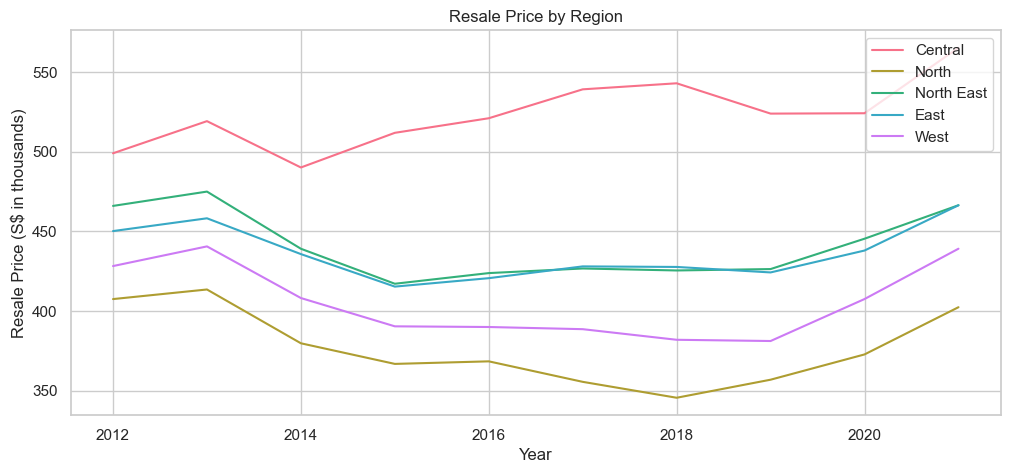

In [116]:
dx = sns.lineplot(data=df_flat_type, x='Tranc_Year', y='resale_price', hue='region', palette='husl', errorbar=None)
plt.legend(title=None, labels=['Central', 'North', 'North East', 'East', 'West'], loc='upper right')
dx.figure.set_size_inches(12,5)
dx.set(xlabel='Year', ylabel='Resale Price (S$ in thousands)', title='Resale Price by Region');

Resale price by flat type

Analysis: price trend follows a very similar fashion as region


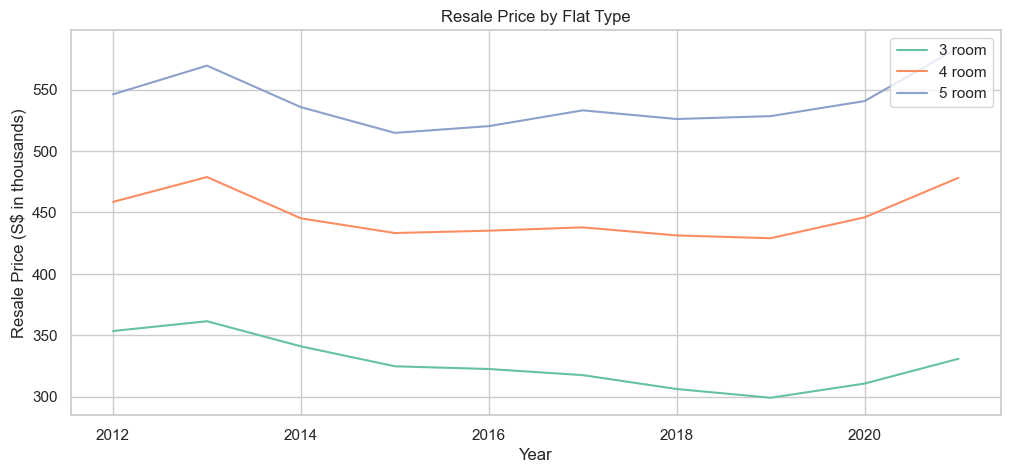

In [117]:
sns.set_theme(style="whitegrid")
sns.set_palette('Set2')
dx = sns.lineplot(data=df_flat_type, x='Tranc_Year', y='resale_price', hue='flat_type', hue_order=['3 ROOM', '4 ROOM', '5 ROOM'], errorbar=None)
plt.legend(title=None, labels=['3 room', '4 room', '5 room'], loc='upper right')
dx.figure.set_size_inches(12,5)
dx.set(xlabel='Year', ylabel='Resale Price (S$ in thousands)', title='Resale Price by Flat Type');

Resale price by floor area 

Code seems to have some aesthetic issue with formatting of legend, small issue

Analysis: general upward trends corroborates well with above analysis, even for the few data points on top right hand corner



[Text(0.5, 0, 'Floor Area (in square feet)'),
 Text(0, 0.5, 'Resale Price (S$ in thousands)'),
 Text(0.5, 1.0, 'Resale Price by Floor Area and Flat Type')]

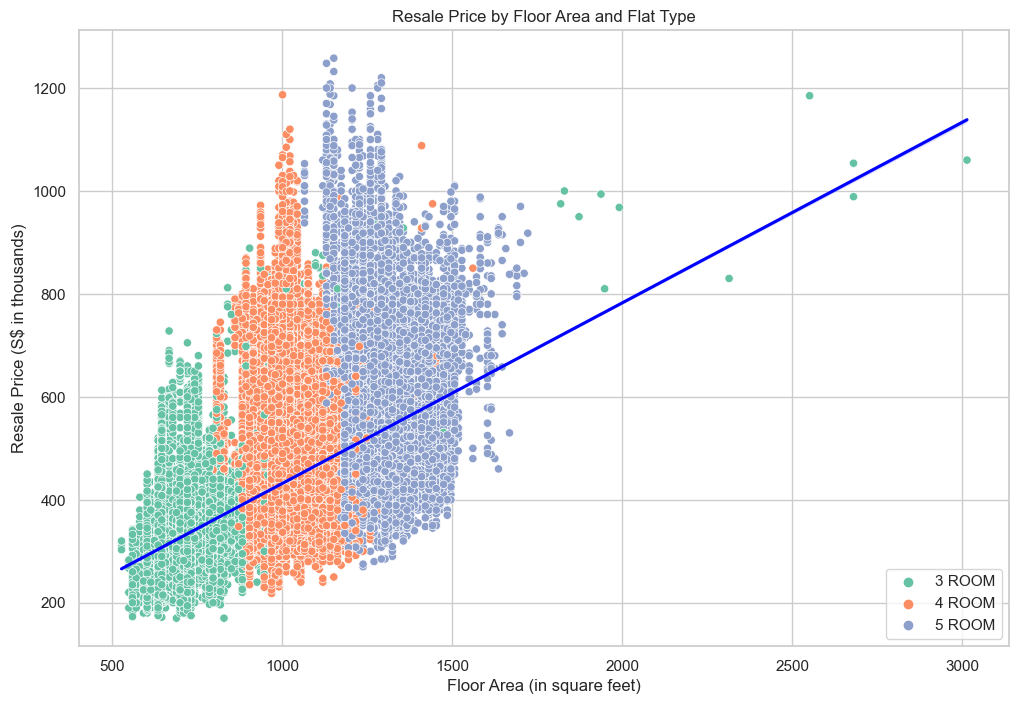

In [118]:
sns.set_theme(style="whitegrid")
sns.set_palette('Set2')
bx = sns.scatterplot(data=df_flat_type, x='floor_area_sqft', y='resale_price', hue='flat_type', hue_order=['3 ROOM', '4 ROOM', '5 ROOM'], legend=True)
bx.figure.set_size_inches(12,8)
plt.legend(title='', loc='lower right')
sns.regplot(data=df_flat_type, x='floor_area_sqft', y='resale_price', scatter=False, fit_reg=True, color='blue')
bx.set(xlabel='Floor Area (in square feet)', ylabel='Resale Price (S$ in thousands)', title='Resale Price by Floor Area and Flat Type')

Resale price by age

Analysis: general downward trend for resale price as the hdb age increases


[Text(0.5, 0, 'HDB Age (in years)'),
 Text(0, 0.5, 'Resale Price (S$ in thousands)'),
 Text(0.5, 1.0, 'Resale Price by HDB Age')]

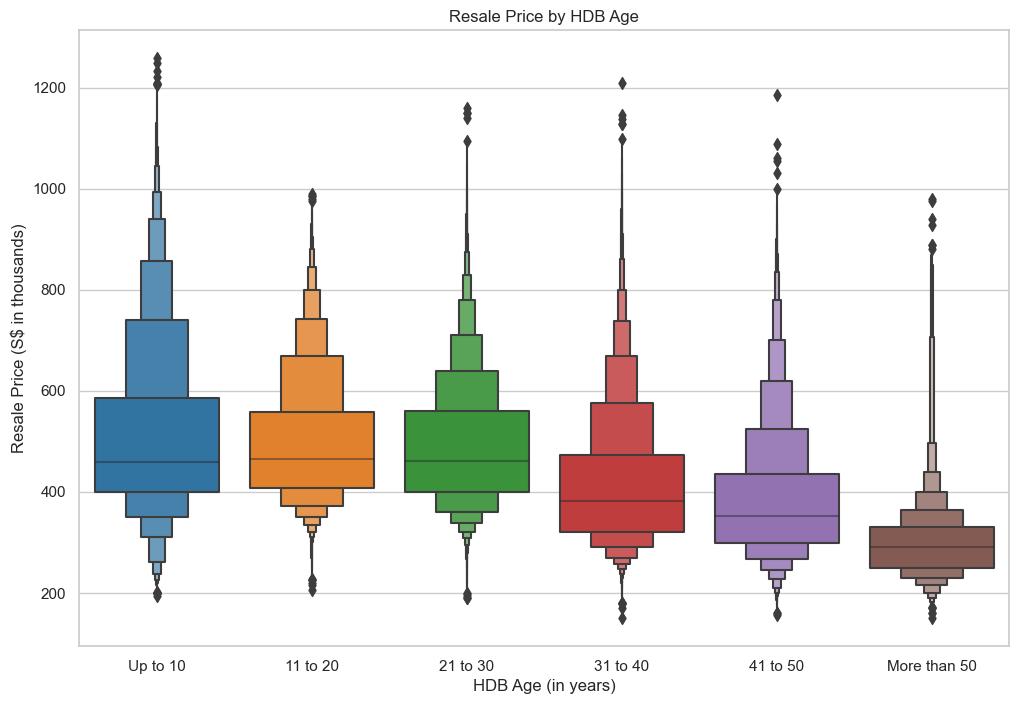

In [119]:
df['hdb_age_bin']=pd.cut(x=df['hdb_age'], bins=[0, 10, 20, 30, 40, 50, 60], labels=['Up to 10', '11 to 20', '21 to 30', '31 to 40', '41 to 50', 'More than 50'])
sns.set_theme(style="whitegrid")
sns.set_palette('tab10')
cx = sns.boxenplot(data=df, x='hdb_age_bin', y='resale_price')
cx.figure.set_size_inches(12,8)
cx.set(xlabel='HDB Age (in years)', ylabel='Resale Price (S$ in thousands)', title='Resale Price by HDB Age')

Resale price by storey level

Analysis: the higher the storey level of the unit, the higher price it can fetch


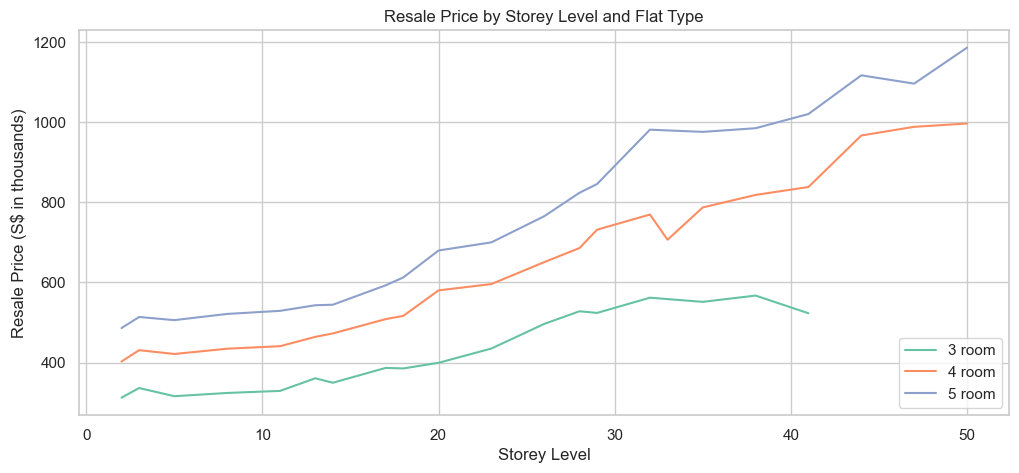

In [120]:
sns.set_theme(style="whitegrid")
sns.set_palette('Set2')
# Create scatter plot using sns.relplot
ax = sns.lineplot(data=df_flat_type, x='mid_storey', y='resale_price', hue='flat_type', hue_order=['3 ROOM', '4 ROOM', '5 ROOM'], legend=None, errorbar=None)
ax.figure.set_size_inches(12, 5)
# Customize legend labels and location
ax.legend(labels=['3 room', '4 room', '5 room'], loc='lower right')
# Set axis labels and title
ax.set(xlabel='Storey Level', ylabel='Resale Price (S$ in thousands)', title='Resale Price by Storey Level and Flat Type')
# Show the plot
plt.show()

Resale price by mall proximity

Analysis: malls within 1.5km proximity see a wider price range


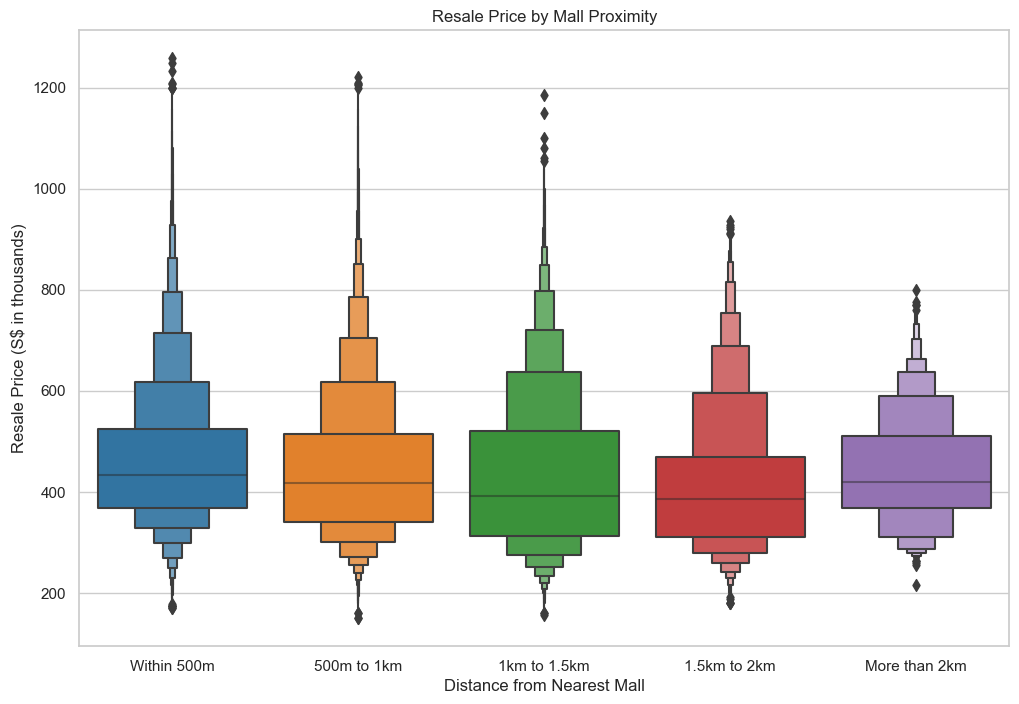

In [121]:
df['mall_dist_bins'] = pd.cut(x=df['Mall_Nearest_Distance'], bins=[0, 500, 1000, 1500, 2000, 3500], labels=['Within 500m', '500m to 1km', '1km to 1.5km', '1.5km to 2km', 'More than 2km'])
sns.set_theme(style="whitegrid")
sns.set_palette('tab10')
cx = sns.boxenplot(data=df, x='mall_dist_bins', y='resale_price')
cx.figure.set_size_inches(12,8)
cx.set(xlabel='Distance from Nearest Mall', ylabel='Resale Price (S$ in thousands)', title='Resale Price by Mall Proximity');

Resale price by hawker proximity

Analysis: 75% of transacted units have a wide range of price for proximity of 500m


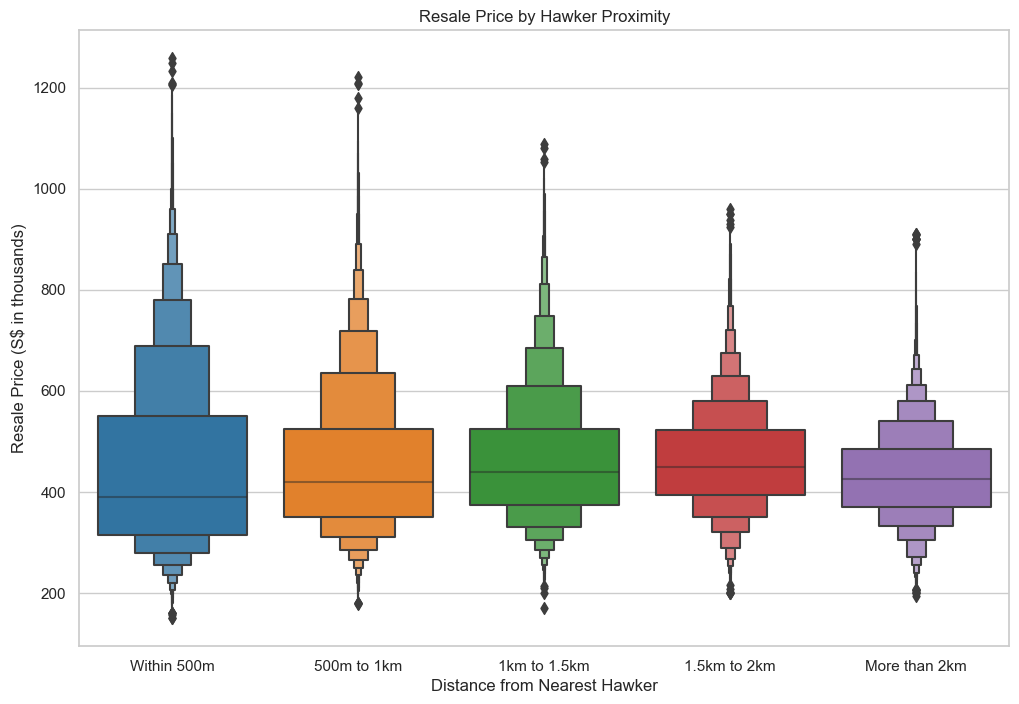

In [122]:
df['hawker_dist_bins'] = pd.cut(x=df['Hawker_Nearest_Distance'], bins=[0, 500, 1000, 1500, 2000, 5000], labels=['Within 500m', '500m to 1km', '1km to 1.5km', '1.5km to 2km', 'More than 2km'])
sns.set_theme(style="whitegrid")
sns.set_palette('tab10')
cx = sns.boxenplot(data=df, x='hawker_dist_bins', y='resale_price')
cx.figure.set_size_inches(12,8)
cx.set(xlabel='Distance from Nearest Hawker', ylabel='Resale Price (S$ in thousands)', title='Resale Price by Hawker Proximity');

Resale price by MRT proximity

Analysis: a wide range of pricing for proximity of 1.5km. Buyers are willing to pay for proximity to MRT


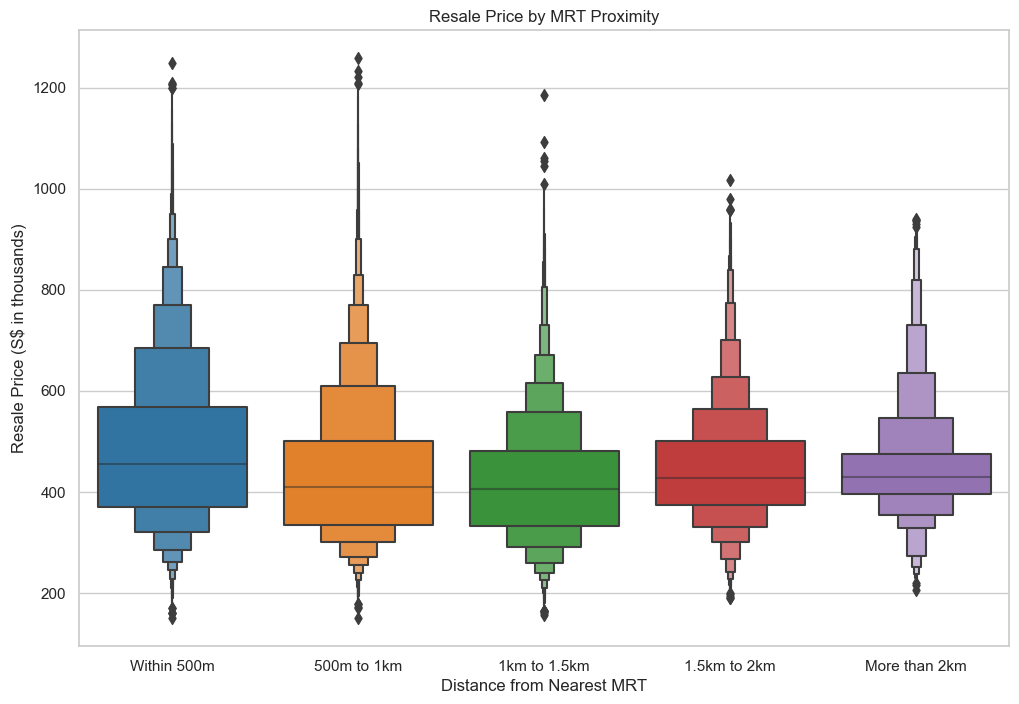

In [123]:
df['mrt_dist_bins'] = pd.cut(x=df['mrt_nearest_distance'], bins=[0, 500, 1000, 1500, 2000, 3500], labels=['Within 500m', '500m to 1km', '1km to 1.5km', '1.5km to 2km', 'More than 2km'])
sns.set_theme(style="whitegrid")
sns.set_palette('tab10')
cx = sns.boxenplot(data=df, x='mrt_dist_bins', y='resale_price')
cx.figure.set_size_inches(12,8)
cx.set(xlabel='Distance from Nearest MRT', ylabel='Resale Price (S$ in thousands)', title='Resale Price by MRT Proximity');

Resale price by Primary School

Analysis: a wide range of pricing for proximity of 1.5km. Buyers are willing to pay for proximity to Pri Sch


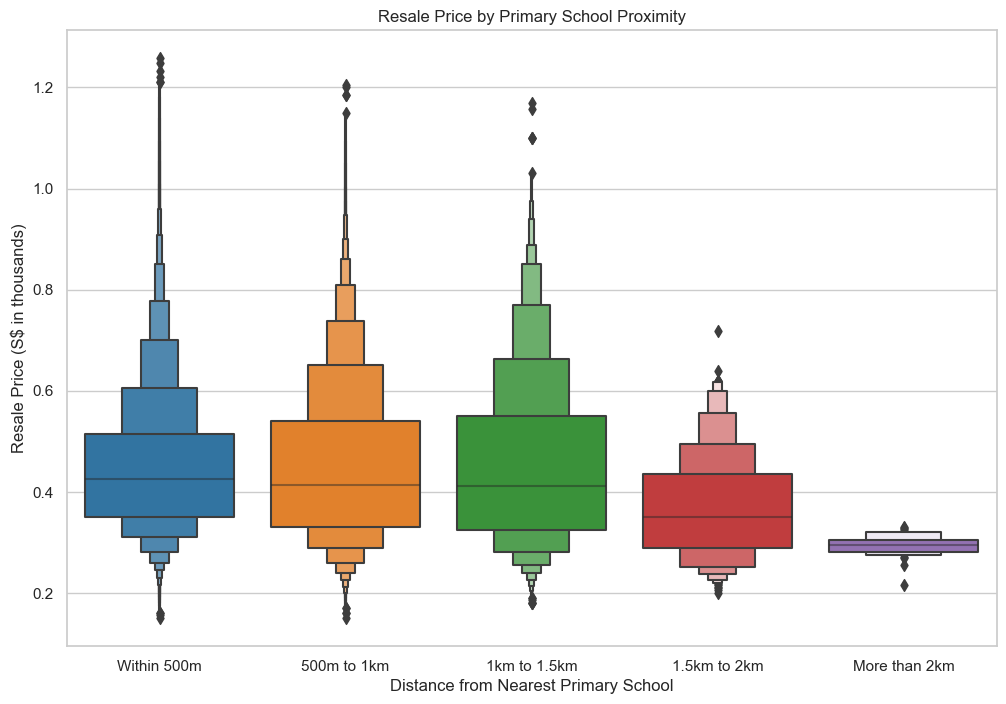

In [124]:
df['pri_sch_bins'] = pd.cut(x=df['pri_sch_nearest_distance'], bins=[0, 500, 1000, 1500, 2000, 3500], labels=['Within 500m', '500m to 1km', '1km to 1.5km', '1.5km to 2km', 'More than 2km'])
df['resale_price'] = df['resale_price'] / 1000
sns.set_theme(style="whitegrid")
sns.set_palette('tab10')
cx = sns.boxenplot(data=df, x='pri_sch_bins', y='resale_price')
cx.figure.set_size_inches(12,8)
cx.set(xlabel='Distance from Nearest Primary School', ylabel='Resale Price (S$ in thousands)', title='Resale Price by Primary School Proximity');

---
# Output the cleaned dataframe to CSV

In [125]:
# processed dataframe is output to CSV 
to_csv_filename = f'../data/train_02_Engineered_forModelTraining.csv'
df_feature_list.to_csv(to_csv_filename, index = False)

to_csv_filename = f'../data/train_02_Engineered_fullfeatures.csv'
df_features.to_csv(to_csv_filename, index = False)

In [ ]:
## this is output for the Streamlit presentation.
columns_for_filter = ['street_name']
df_filter_list = df[columns_for_filter+ target + numeric_features + dummified_features]
df_out = df_filter_list.groupby(['street_name','hdb_age','mrt_nearest_distance','bus_interchange','max_floor_lvl','Mall_Nearest_Distance','Hawker_Nearest_Distance','Ammenities_same_block','Ammenities_within_500m','Ammenities_within_1km','Ammenities_within_2km','pri_sch_dist_vacancy','sec_sch_dist_cutoff','mrt_no','town','region'])[['street_name']].value_counts()
to_csv_filename = f'../data/train_02_Engineered_filtering.csv'
df_out.to_csv(to_csv_filename, index = True)